In [1]:
import numpy as np
import pickle
import pandas as pd
import os
import gzip
import matplotlib.pyplot as plt

In [2]:
directory = os.path.join('test')
file = 'bbox.pkl.gz'
full_path = os.path.join(directory, file)

In [3]:
bbox = pd.read_pickle(os.path.join(directory, 'bbox.pkl.gz'))
# meta_info = pd.read_pickle(os.path.join(directory, 'meta_info.pkl.gz'))
timestamp = pd.read_pickle(os.path.join(directory, 'timestamp.pkl.gz'))

In [4]:
channels_data_list = []
channels_name = []

for folder in os.listdir(directory):
    if not os.path.isdir(os.path.join(directory, folder)):
        continue
    for channel_name in os.listdir(os.path.join(directory, folder)):
        file = gzip.GzipFile(os.path.join(directory, folder, channel_name), "r")
        data = np.load(file)
        for i in range(data.shape[3]):
            channels_name.append(channel_name)
        channels_data_list.append(data)
        
channels_data = np.concatenate(channels_data_list, axis=3)

In [5]:
channels_name

['L2A.npy.gz',
 'L2A.npy.gz',
 'L2A.npy.gz',
 'L2A.npy.gz',
 'L2A.npy.gz',
 'L2A.npy.gz',
 'L2A.npy.gz',
 'L2A.npy.gz',
 'L2A.npy.gz',
 'L2A.npy.gz',
 'L2A.npy.gz',
 'L2A.npy.gz',
 'L2A.npy.gz',
 'CLD.npy.gz',
 'CLM.npy.gz',
 'CLP.npy.gz',
 'IS_DATA.npy.gz',
 'SCL.npy.gz',
 'SNW.npy.gz']

In [6]:
channels_data.shape

(5, 64, 64, 19)

In [51]:
def is_all_exist(sourse_dir):
    files = ['timestamp.pkl.gz',
            'bbox.pkl.gz']
    for file in files:
        if not os.path.exists(os.path.join(sourse_dir, file)):
            print(os.path.join(sourse_dir, file))
            return False
    return True

In [58]:
df_pipes = pd.DataFrame(columns=['time', 'lon_start', 'lat_start', 'lon_end', 'lat_end'])
start_folder = os.path.join('pipes')
sub_folders = os.path.join('sentinel2-l2a', 'patches', '64x64-10', '2021')

for month in os.listdir(start_folder):
    for folder_a in os.listdir(os.path.join(start_folder, month)):
        final_folder = os.path.join(start_folder, month, folder_a, sub_folders)
        if not is_all_exist(final_folder):
            continue
        try:
            timestamp = pd.read_pickle(os.path.join(final_folder, 'timestamp.pkl.gz'))
            bbox = pd.read_pickle(os.path.join(final_folder, 'bbox.pkl.gz'))

            out_frames_dir = 'pipes_frames'
            for i in range(len(timestamp)):
                df_pipes = df_pipes.append(pd.DataFrame([[timestamp[i], bbox.min_x, bbox.min_y, bbox.max_x,  bbox.max_y]],
                                       columns=['time', 'lon_start', 'lat_start', 'lon_end', 'lat_end']))
        except:
            continue

pipes\2021-04\4538600e-dd1c-4b9d-ac6c-da494061c9b8\sentinel2-l2a\patches\64x64-10\2021\timestamp.pkl.gz
pipes\2021-04\4541468c-320d-4844-b49d-c5eaf4f6a66d\sentinel2-l2a\patches\64x64-10\2021\timestamp.pkl.gz
pipes\2021-04\45426312-cab2-4fbb-8ca3-260cf3e4f611\sentinel2-l2a\patches\64x64-10\2021\timestamp.pkl.gz
pipes\2021-04\4546a630-4197-4703-afb9-a8093e657e64\sentinel2-l2a\patches\64x64-10\2021\timestamp.pkl.gz
pipes\2021-04\45473d99-0cba-42dd-b436-b504fff53802\sentinel2-l2a\patches\64x64-10\2021\timestamp.pkl.gz
pipes\2021-04\45555b4e-8c32-4975-9fd9-de63a6540e1d\sentinel2-l2a\patches\64x64-10\2021\timestamp.pkl.gz
pipes\2021-04\4555f0e6-a20c-48de-b1a2-8eae483260a6\sentinel2-l2a\patches\64x64-10\2021\timestamp.pkl.gz
pipes\2021-04\455fc485-6c87-406d-9aa5-839bafc2b0ac\sentinel2-l2a\patches\64x64-10\2021\timestamp.pkl.gz
pipes\2021-04\456c86bc-63e5-4e74-b7ad-00bd19081936\sentinel2-l2a\patches\64x64-10\2021\timestamp.pkl.gz
pipes\2021-04\457378a2-7697-49d2-b466-07a9a5ac56e8\sentinel2-l2a

In [62]:
len(df_pipes)

361374

In [60]:
df_pipes.to_csv('pipes_df.csv', index=False)

In [55]:
df_spills = pd.DataFrame(columns=['time', 'lon_start', 'lat_start', 'lon_end', 'lat_end'])
start_folder = os.path.join('spills')
for year in os.listdir(start_folder):
    print(year)
    for month in os.listdir(os.path.join(start_folder, year)):
        print(month)
        for folder_a in os.listdir(os.path.join(start_folder, year, month)):
            final_folder = os.path.join(start_folder, year, month, folder_a)
            if not is_all_exist(final_folder):
                continue
            try:
                timestamp = pd.read_pickle(os.path.join(final_folder, 'timestamp.pkl.gz'))
                bbox = pd.read_pickle(os.path.join(final_folder, 'bbox.pkl.gz'))
                
                out_frames_dir = 'spills_frames'
                for i in range(len(timestamp)):
                    df_spills = df_spills.append(pd.DataFrame([[timestamp[i], bbox.min_x, bbox.min_y, bbox.max_x,  bbox.max_y]],
                                           columns=['time', 'lon_start', 'lat_start', 'lon_end', 'lat_end']))
            except Exception as e:
                print(e)
                continue

2017
2017-01
spills\2017\2017-01\КБ-2020-1\timestamp.pkl.gz
spills\2017\2017-01\РН-ВАНЬН-2013-100\timestamp.pkl.gz
spills\2017\2017-01\РН-ВАНЬН-2013-109\timestamp.pkl.gz
spills\2017\2017-01\РН-ВАНЬН-2013-122\timestamp.pkl.gz
spills\2017\2017-01\РН-ВАНЬН-2013-127\timestamp.pkl.gz
spills\2017\2017-01\РН-ВАНЬН-2013-134\timestamp.pkl.gz
spills\2017\2017-01\РН-ВАНЬН-2013-137\timestamp.pkl.gz
spills\2017\2017-01\РН-ВАНЬН-2013-144\timestamp.pkl.gz
spills\2017\2017-01\РН-ВАНЬН-2013-155\timestamp.pkl.gz
spills\2017\2017-01\РН-ВАНЬН-2013-159\timestamp.pkl.gz
spills\2017\2017-01\РН-ВАНЬН-2013-162\timestamp.pkl.gz
spills\2017\2017-01\РН-ВАНЬН-2013-177\timestamp.pkl.gz
spills\2017\2017-01\РН-ВАНЬН-2013-183\timestamp.pkl.gz
spills\2017\2017-01\РН-ВАНЬН-2013-185\timestamp.pkl.gz
spills\2017\2017-01\РН-ВАНЬН-2013-194\timestamp.pkl.gz
spills\2017\2017-01\РН-ВАНЬН-2013-195\timestamp.pkl.gz
spills\2017\2017-01\РН-ВАНЬН-2013-197\timestamp.pkl.gz
spills\2017\2017-01\РН-ВАНЬН-2013-219\timestamp.pkl.gz
spill

In [56]:
len(df_spills)

885628

In [57]:
df_spills.to_csv('spills_df.csv', index=False)

In [188]:
timestamp

[datetime.datetime(2017, 2, 7, 6, 30, 23, tzinfo=tzlocal()),
 datetime.datetime(2017, 7, 7, 6, 30, 17, tzinfo=tzlocal()),
 datetime.datetime(2017, 8, 22, 6, 50, 14, tzinfo=tzlocal()),
 datetime.datetime(2017, 10, 11, 6, 48, 9, tzinfo=tzlocal()),
 datetime.datetime(2017, 11, 14, 6, 31, 20, tzinfo=tzlocal())]

In [8]:
channels_data[0][:,:,0].shape

(64, 64)

In [9]:
channels_data[0][0,:,4]

array([6.366, 6.334, 6.334, 6.717, 6.717, 6.564, 6.564, 6.252, 6.252,
       6.446, 6.446, 6.335, 6.335, 6.335, 5.969, 5.969, 6.885, 6.885,
       7.495, 7.495, 7.507, 7.507, 7.586, 7.586, 7.554, 7.554, 7.5  ,
       7.5  , 7.478, 7.478, 7.514, 7.514, 7.568, 7.568, 7.581, 7.581,
       7.562, 7.562, 7.557, 7.557, 7.536, 7.536, 7.51 , 7.51 , 7.585,
       7.585, 7.359, 7.359, 7.259, 7.259, 7.192, 7.192, 7.447, 7.447,
       7.823, 7.823, 7.77 , 7.77 , 7.821, 7.821, 7.92 , 7.92 , 7.672,
       7.672], dtype=float32)

In [10]:
def visualize(index, ch_name, example, **images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join((str(index), ch_name, str(example))).title(),
                  fontsize = 15,
                  color = 'white')
        plt.imshow(image)
    plt.show()

In [11]:
max_element = np.amax(channels_data[0][:,:,1:4])
min_element = np.amin(channels_data[0][:,:,1:4])

In [48]:
frame = 4

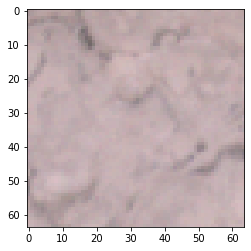

In [49]:
plt.imshow(channels_data[frame][:,:,1:4]/max_element)

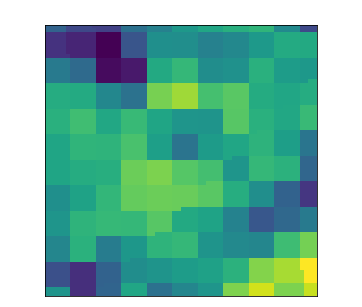

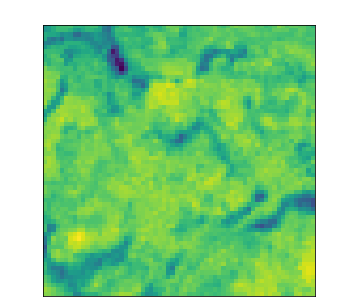

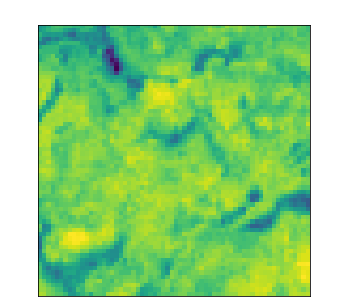

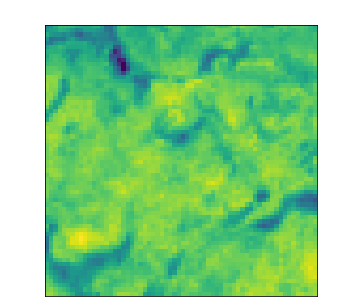

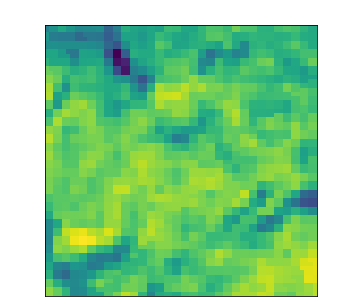

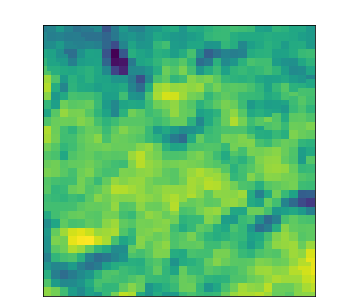

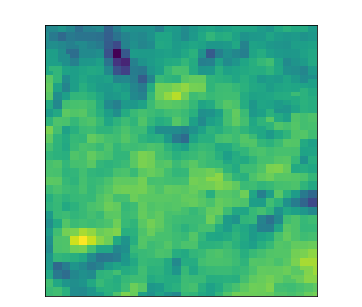

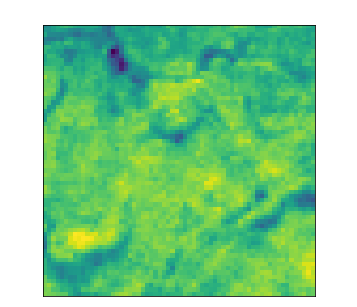

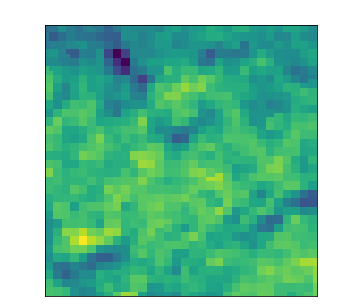

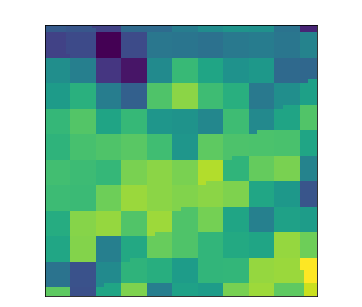

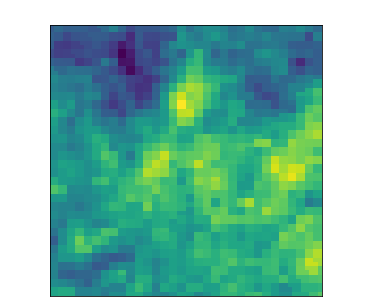

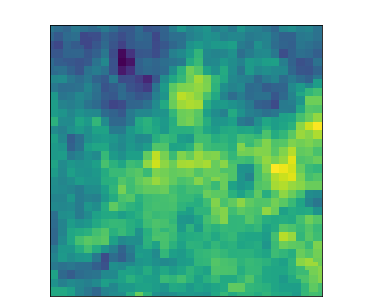

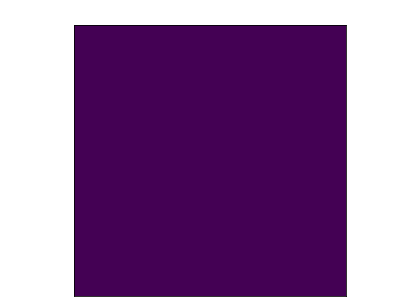

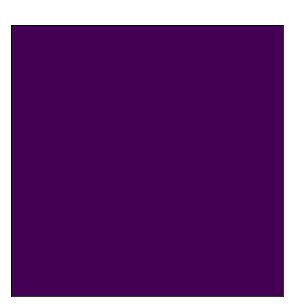

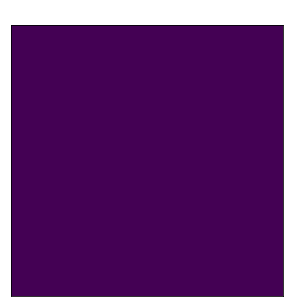

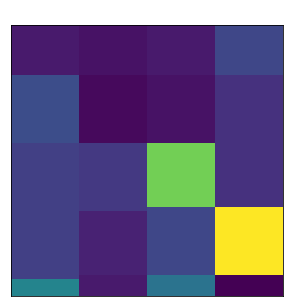

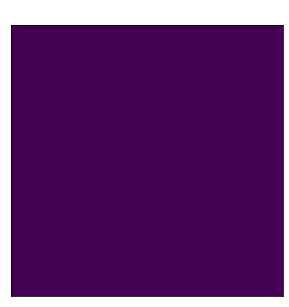

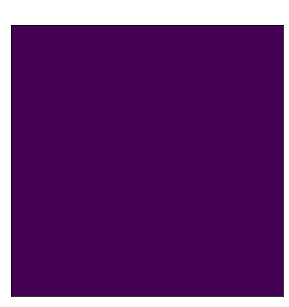

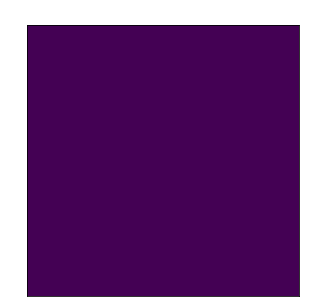

In [50]:
ny = len(channels_name)
for channel_index in range(ny):
    visualize(channel_index,
              channels_name[channel_index],
              channels_data[frame][20:25,30,channel_index],
              channel = channels_data[frame][:,:,channel_index])
    